In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#한글 폰트 설정
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
#폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

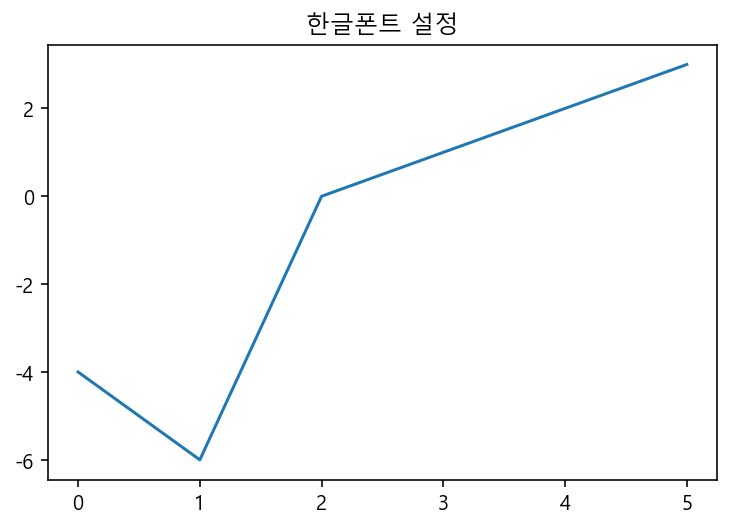

In [2]:
plt.title("한글폰트 설정")
plt.plot([-4,-6,0,1,2,3])

In [3]:
data = f'상가업소정보_201912_01.csv'
data

'상가업소정보_201912_01.csv'

In [4]:
df = pd.read_csv(data, sep='|')

In [5]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [6]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

In [7]:
df.isnull().mean() #결측치의 비율을 확인

상가업소번호       0.000000
상호명          0.000002
지점명          0.866347
상권업종대분류코드    0.000000
상권업종대분류명     0.000000
상권업종중분류코드    0.000000
상권업종중분류명     0.000000
상권업종소분류코드    0.000000
상권업종소분류명     0.000000
표준산업분류코드     0.059946
표준산업분류명      0.059946
시도코드         0.000000
시도명          0.000000
시군구코드        0.000000
시군구명         0.000000
행정동코드        0.000000
행정동명         0.000000
법정동코드        0.000000
법정동명         0.000000
지번코드         0.000000
대지구분코드       0.000000
대지구분명        0.000000
지번본번지        0.000000
지번부번지        0.172145
지번주소         0.000000
도로명코드        0.000000
도로명          0.000000
건물본번지        0.000000
건물부번지        0.874515
건물관리번호       0.000000
건물명          0.537010
도로명주소        0.000000
구우편번호        0.000000
신우편번호        0.000016
동정보          0.911351
층정보          0.394912
호정보          0.851370
경도           0.000000
위도           0.000000
dtype: float64

<AxesSubplot:>

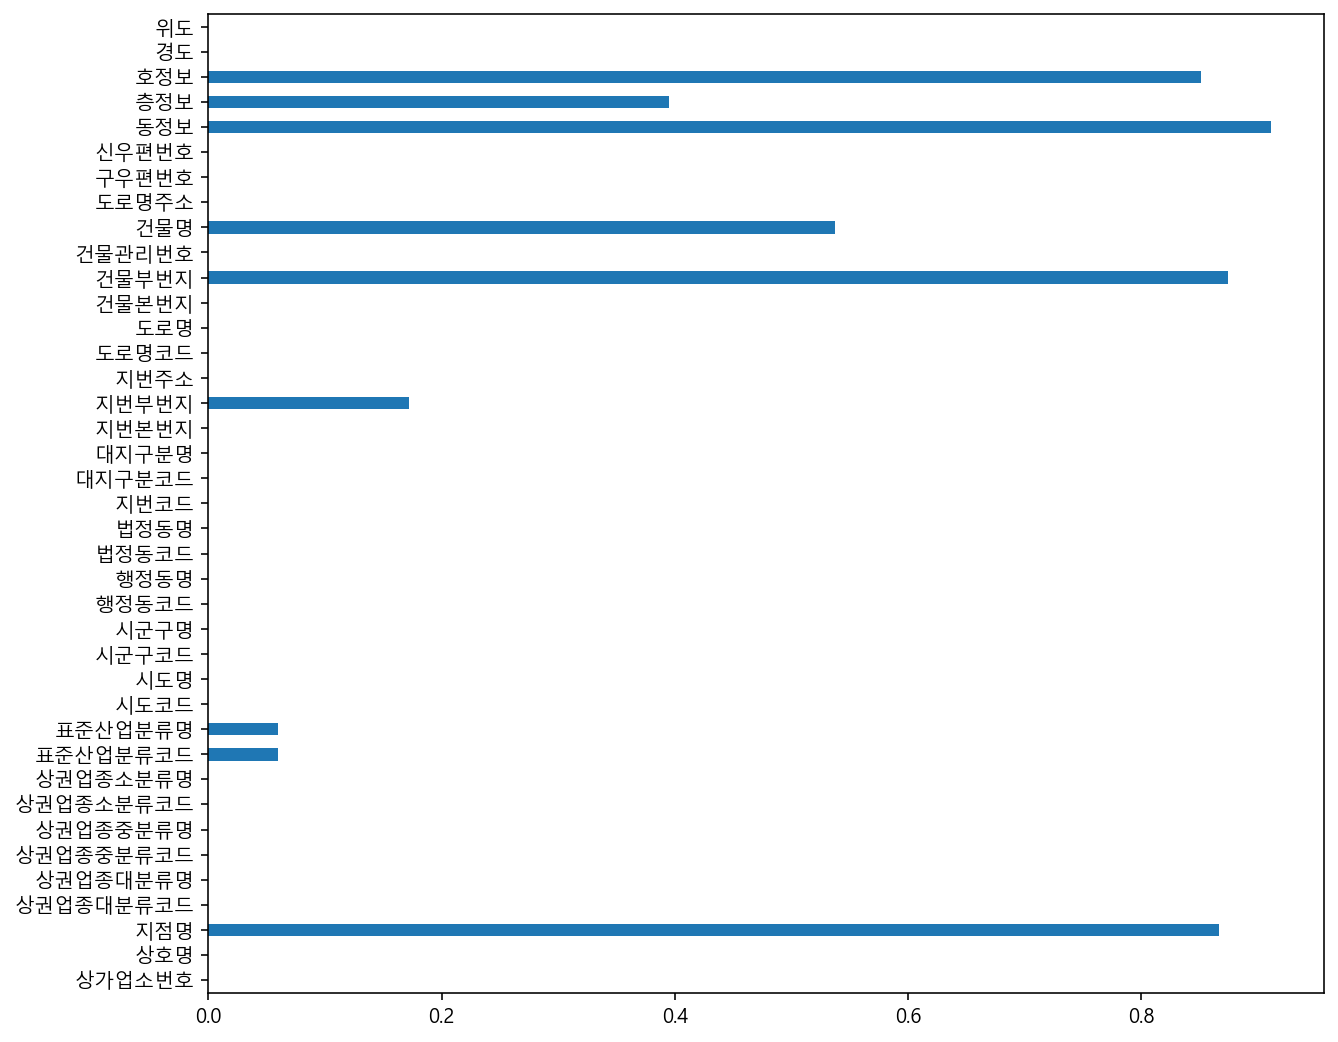

In [8]:
df.isnull().mean().plot.barh(figsize=(10,9))

In [9]:
#사용하지 않는 컬럼 제거하기
#drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
#여기에서는 사용할 컬럼만 따로 모아서 사용합니다. 중요!!!
columns = ['상호명','상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명','시군구명','행정동명','법정동명','도로명주소','경도','위도']
columns

['상호명',
 '상권업종대분류명',
 '상권업종중분류명',
 '상권업종소분류명',
 '시도명',
 '시군구명',
 '행정동명',
 '법정동명',
 '도로명주소',
 '경도',
 '위도']

In [10]:
print(df.shape)
df = df[columns].copy()
df.shape

(573680, 39)


(573680, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


In [12]:
df_seoul = df[df["시도명"]=="서울특별시"].copy()
df_seoul.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [13]:
#unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다.
df_seoul["시군구명"].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [14]:
df_seoul["시군구명"].nunique() #nunique() = 개수

25

In [15]:
#파일 새로 만들어서 저장해주기
df_seoul.to_csv("seoul_open_store.csv", index= False) 

In [16]:
pd.read_csv("seoul_open_store.csv").head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
4,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


배스킨라빈스 , 던킨도너츠 위치 분석

: 특정 상호만 가져오기, 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.

In [17]:
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [18]:
df_seoul["상호명_소문자"].str.extract("(베|배)스킨라빈스|baskinrobbins")[0].value_counts()

배    347
베    117
Name: 0, dtype: int64

In [19]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("베스킨라빈스|배스킨라빈스|baskinrobbins"),"상호명_소문자"].shape

(466,)

In [20]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"),"상호명_소문자"].shape

(191,)

In [21]:

df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains('베스킨|배스킨|baskinrobbins|던킨|dunkin')].copy()
df_31.shape

(659, 12)

In [22]:
df_31.loc[df_31["상호명_소문자"].str.contains("베스킨|배스킨|baskinrobbins"),
          "브랜드명"] = "배스킨라빈스"
df_31[["상호명","브랜드명"]].head()

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,NaN


In [23]:
#던킨 가져올 때, ~것만 해주면 된다.
#df_31.loc[~df_31["상호명_소문자"].str.contains("베스킨|배스킨|baskinrobbins"),
#         "브랜드명"]

In [24]:
df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")
df_31["브랜드명"]

76        배스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      배스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    배스킨라빈스
561930    배스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 659, dtype: object

In [25]:
df_31["상권업종대분류명"].value_counts()

음식       657
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [26]:
df_31[df_31["상권업종대분류명"].isin(["소매","생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


In [27]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매","생활서비스"])].copy()
df_31.shape

(657, 13)

범주형 값으로 countplot그리기

In [42]:
#value_counts로 "브랜드명"의 빈도수를 구합니다.
brand_count = df_31["브랜드명"].value_counts()
brand_count

배스킨라빈스    466
던킨도너츠     191
Name: 브랜드명, dtype: int64

<AxesSubplot:>

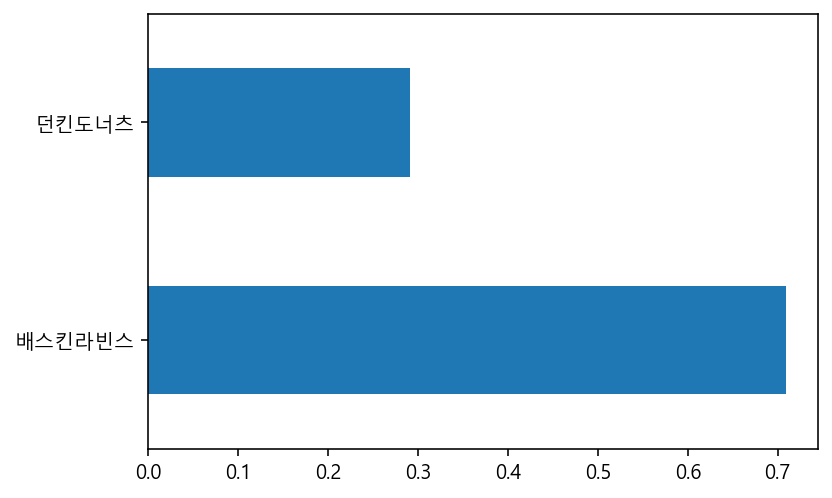

In [39]:

#normalize=True로 빈도수의 비율을 구합니다.
df_31["브랜드명"].value_counts(normalize=True).plot.barh()

In [47]:
brand_count.index

Index(['배스킨라빈스', '던킨도너츠'], dtype='object')

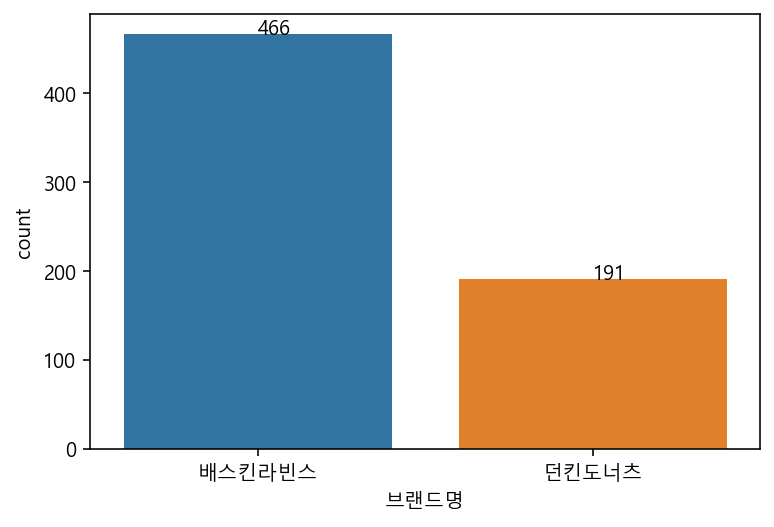

In [50]:
#countplot을 그립니다.
g = sns.countplot(data=df_31, x="브랜드명")

for i, val in enumerate (brand_count.index) :
    g.text(x=i,y=brand_count[i], s=brand_count[i])


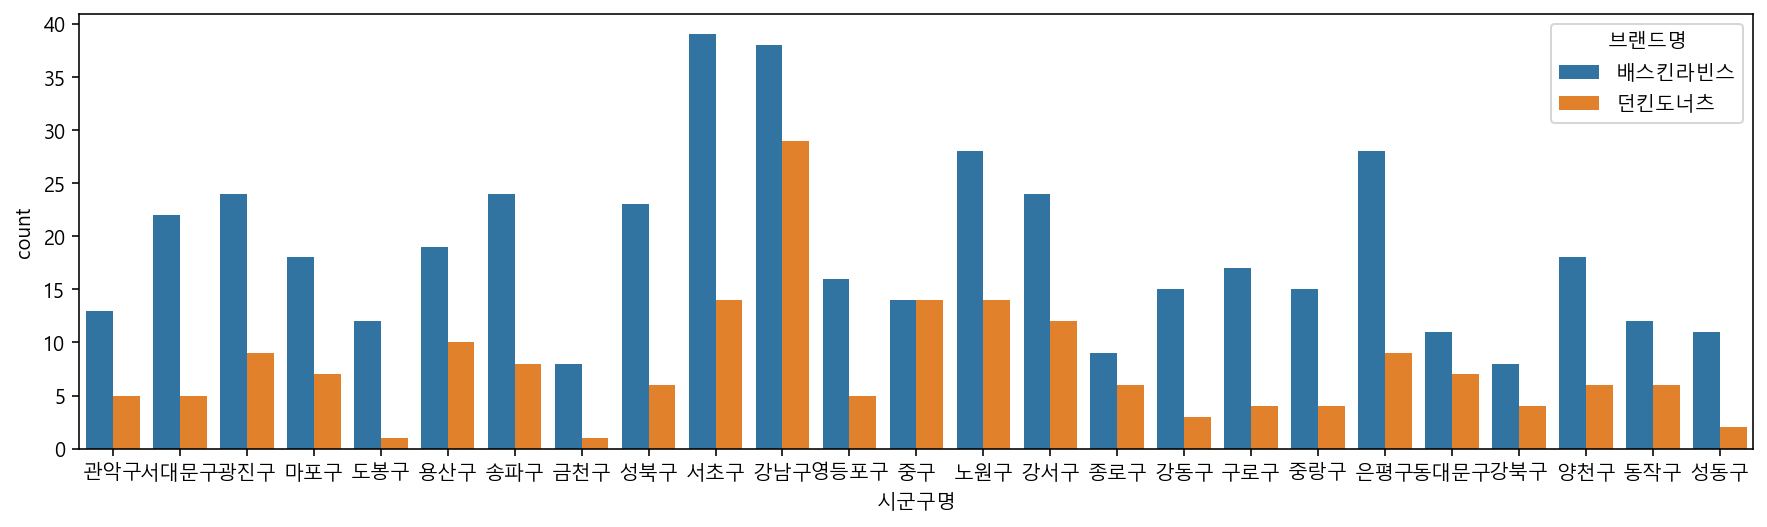

In [53]:
#시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot을 그립니다.
plt.figure(figsize=(15,4))
g = sns.countplot(data=df_31, x="시군구명",hue="브랜드명")

scatterplot그리기

<AxesSubplot:xlabel='경도', ylabel='위도'>

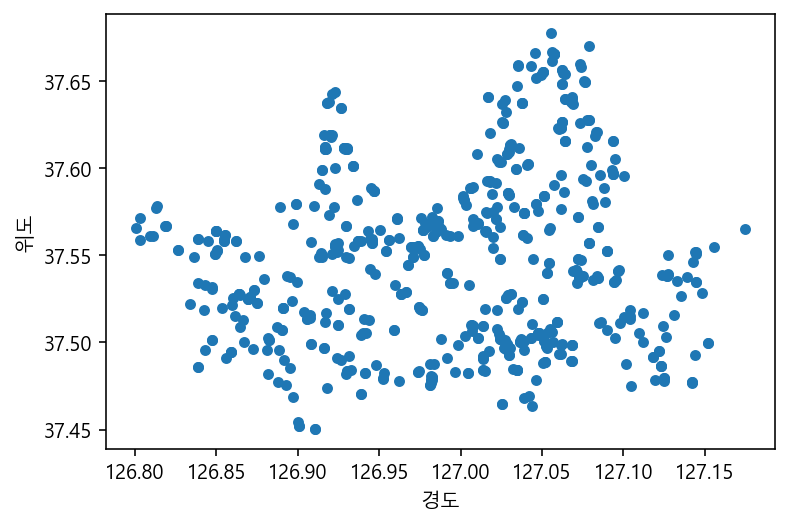

In [54]:
#Pandas의 plot으로 scatterplot을 그리기.
df_31[["위도","경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

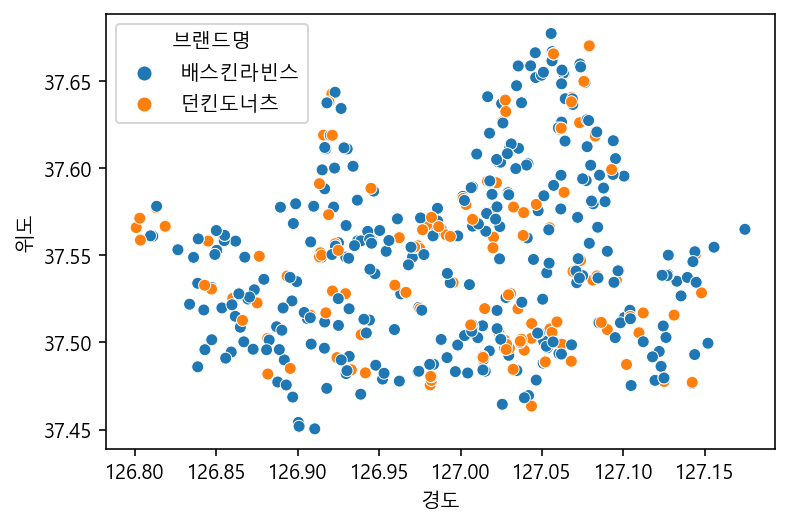

In [56]:
#seaborn의 scatterplot으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_31, x="경도", y="위도", hue = "브랜드명")

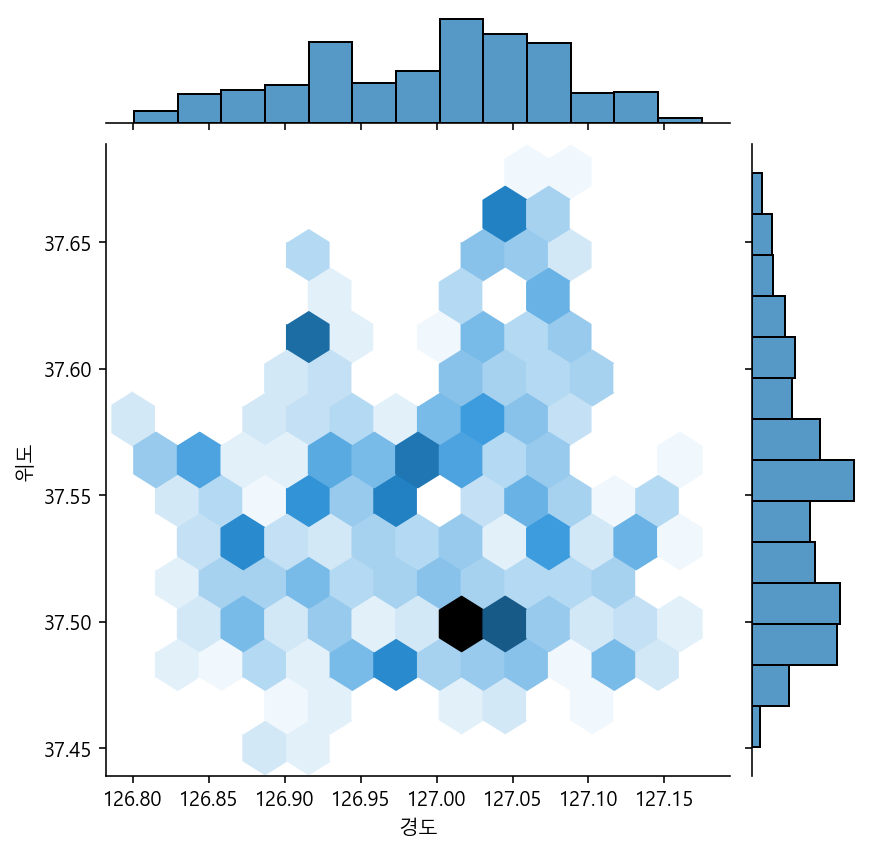

In [58]:
sns.jointplot(data=df_31, x="경도", y="위도", kind="hex")

In [59]:
import folium

In [61]:
#지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
lat = df_31["위도"].mean()
long = df_31["경도"].mean()

In [80]:
#샘플을 하나 추출해서 지도에 표시
m = folium.Map([lat,long])
folium.Marker(
    [37.495593, 127.039032],
    popup = '<i>던킨도너츠</i>',
    tooltip = "던킨도너츠").add_to(m)
m.save('index.html') #html로 파일 저장하기
m

In [81]:
#일부 데이터를 출력하기
df_31.sample(random_state=31)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
355666,배스킨라빈스31건대동문회관점,음식,패스트푸드,아이스크림판매,서울특별시,광진구,자양3동,자양동,서울특별시 광진구 아차산로36길 5,127.074625,37.538335,배스킨라빈스31건대동문회관점,배스킨라빈스


서울의 배스킨라빈스와 던킨도너츠 매장 분포

-배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [82]:
#데이터프레임의 인덱스만 출력합니다.
df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   2652,   3007,
             11060,  13042,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=657)

In [95]:
#기본 마커로 표현하기
# icon = folium.Icon(color=icon_color)로 아이콘 컬러를 변경합니다.


m = folium.Map([lat,long] , zoom_start = 10)

for i in df_31.index[:20]:
    
    sub_lat = df_31.loc[i,"위도"]
    sub_long = df_31.loc[i,"경도"]
    title = df_31.loc[i,"상호명"] + " " + df_31.loc[i,"도로명주소"]
   
    icon_color = "blue"
    if df_31.loc[i,"브랜드명"]=="던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long],
        icon = folium.Icon(color=icon_color),
        popup = f'<i>{title}</i>',
        tooltip = title).add_to(m)
    

m.save('index.html') #html로 파일 저장하기
m


In [ ]:
#MarkerCluster로 표현하기
